In [1]:
from mp_api.client import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [2]:
mp_key = "XOCzg18zLbitVQMZilg0OGK9MJ5rjMXh"
mp_id = "mp-7173"
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)
conv_structure = SpacegroupAnalyzer(structure).get_conventional_standard_structure()
print("Téléchargement terminé !")

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Téléchargement terminé !


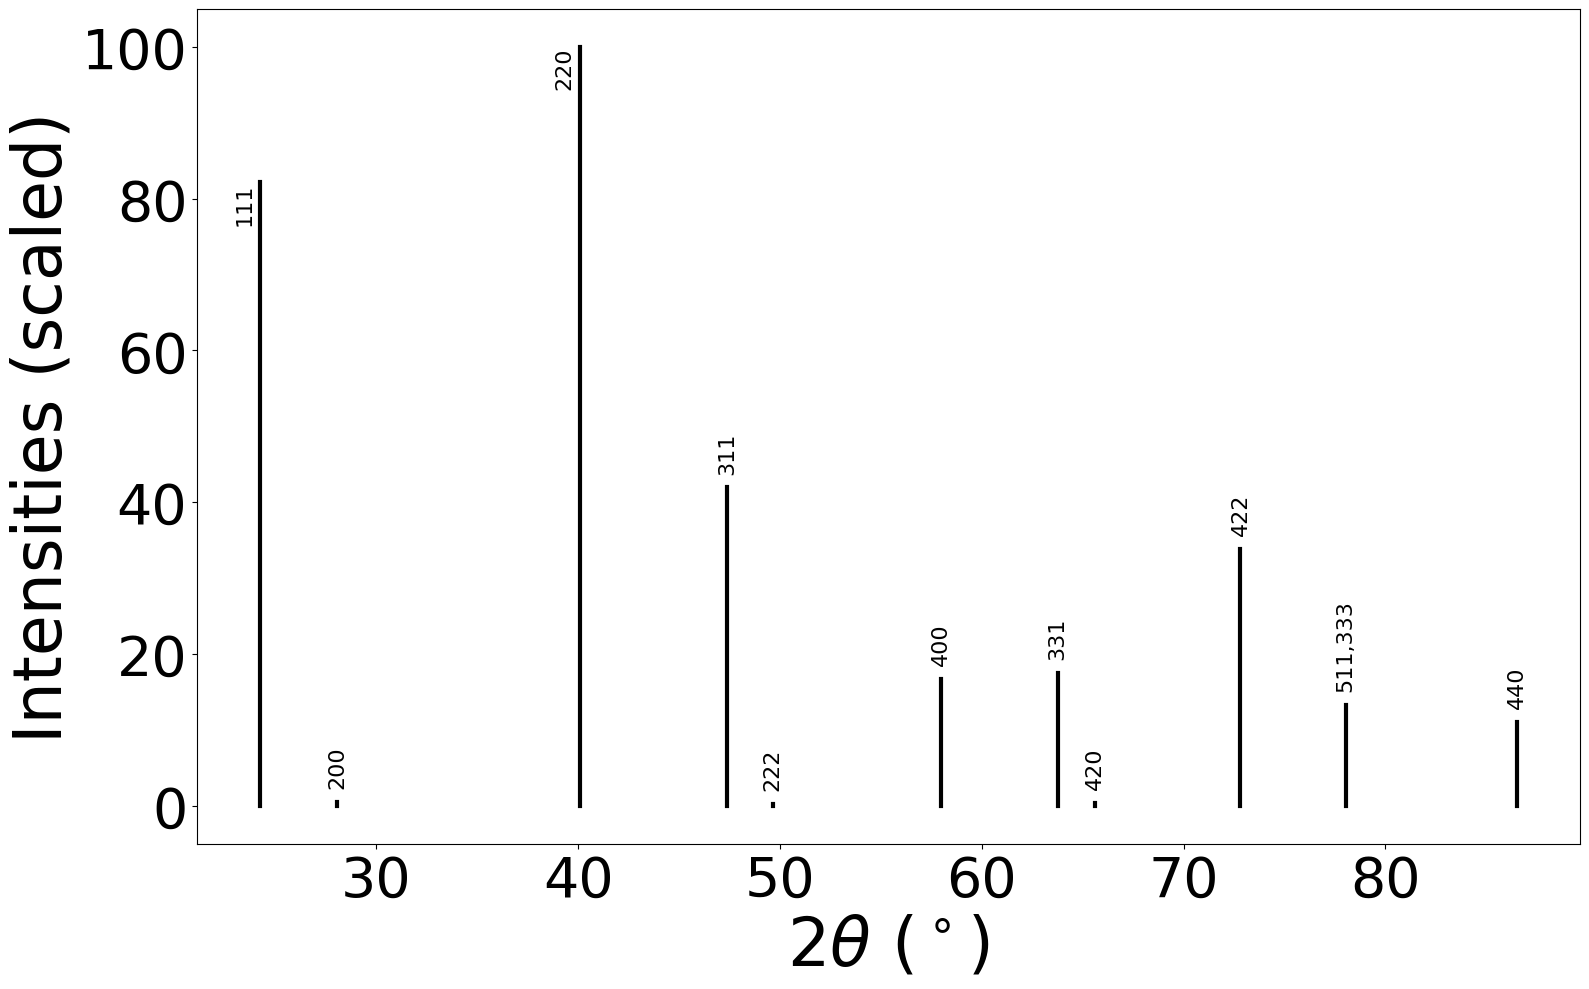

In [3]:
xrd = XRDCalculator(wavelength = 1.54060)  # rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.
xrd.get_plot(conv_structure)
pattern = xrd.get_pattern(conv_structure)

In [7]:
for i in range(3):
    theta2 = pattern.x[i]
    intensité = pattern.y[i]
    indices_hkl = pattern.hkls[i][0].get("hkl")
    multiplicité = pattern.hkls[i][0].get("multiplicity")
    print("Pic numéro " + str(i+1) +":\n")
    print("- Angle 2θ: " + str(theta2) +"°\n")
    print("- Intensité relative du pic (sur une échelle de 0 à 100): " +str(intensité) +"\n")
    print("- Les indices (h,k,l) sont " + str(indices_hkl) +"  et de multiplicité " + str(multiplicité) +"\n\n")

Pic numéro 1:

- Angle 2θ: 24.22570820754806°

- Intensité relative du pic (sur une échelle de 0 à 100): 82.16418475510227

- Les indices (h,k,l) sont (1, 1, 1)  et de multiplicité 8


Pic numéro 2:

- Angle 2θ: 28.044651312063415°

- Intensité relative du pic (sur une échelle de 0 à 100): 0.5633345866050642

- Les indices (h,k,l) sont (2, 0, 0)  et de multiplicité 6


Pic numéro 3:

- Angle 2θ: 40.07851176605835°

- Intensité relative du pic (sur une échelle de 0 à 100): 100.0

- Les indices (h,k,l) sont (2, 2, 0)  et de multiplicité 12




A noter qu'une intensité relative d'un pic égale à 100 correspond à une interférence constructive et, à l'inverse, une intensité relative nulle correspond à une interférence destructive.